# Support Vector Machines

In [13]:
import pandas as pd
from sklearn import svm
import sklearn.model_selection
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale
from statistics import mean
import numpy
from scipy import stats
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, mutual_info_score, matthews_corrcoef, confusion_matrix, precision_score, recall_score

## Understanding Support Vector Machines



In [3]:
df = pd.read_csv('../data/processed/test_train.csv').drop(columns = ['Unnamed: 0'])

## Training the models


In [4]:
kf = KFold(n_splits=10, random_state=57, shuffle=True)
parameters = []
for i in range(1,5):
    print(i)
    #for each category of attack, split the data into the required test and train sections
    dftrain = df.loc[df['test'] != i]
    score_1 = 0
    parameters_1 = []
    for split in kf.split(dftrain):
        print("round")
        #on the training data, do a 10-fold 
        train = dftrain.iloc[split[0]]
        test = dftrain.iloc[split[1]]
        xtrain = scale(train.iloc[:,:-2])
        xtest = scale(test.iloc[:,:-2])
        ytrain = train.iloc[:,-2]
        ytest = test.iloc[:,-2]
        #fit one of the k-folds 
        model_1 = svm.SVC(cache_size = 1000)
        instance = model_1.fit(xtrain,ytrain)
        temp_score_1 = instance.score(xtest,ytest)
        #if the new model works better than previous ones then save its parameters
        if temp_score_1 > score_1:
            score_1 = temp_score_1
            parameters_1 = instance
    #list of the best models from each of the 4 main training data sets
    parameters.append(parameters_1)
score = 0
best_params = []
#For each model test how it does in looking at new attacks
for j in range(4):
    print("j - ", j)
    instance = parameters[j]  
    scores = []
    for i in range(1,5):
        print(i)
        x = scale(df.loc[df['test'] == i].iloc[:,:-2])
        y = df.loc[df['test'] == i].iloc[:,-2]
        scores.append(instance.score(x,y))
        print(scores)
    if mean(scores) > score:
        score = mean(scores)
        best_params = parameters[j]
print(score)

1
round
round
round
round
round
round
round
round
round
round
2
round
round
round
round
round
round
round
round
round
round
3
round
round
round
round
round
round
round
round
round
round
4
round
round
round
round
round
round
round
round
round
round
j -  0
1
[0.11771241405680728]
2
[0.11771241405680728, 0.9838315324552409]
3
[0.11771241405680728, 0.9838315324552409, 0.9936425905418154]
4
[0.11771241405680728, 0.9838315324552409, 0.9936425905418154, 0.990124758390441]
j -  1
1
[0.9979342370745526]
2
[0.9979342370745526, 0.09559113494755107]
3
[0.9979342370745526, 0.09559113494755107, 0.05746277839301095]
4
[0.9979342370745526, 0.09559113494755107, 0.05746277839301095, 0.2299771569144263]
j -  2
1
[0.9974027660541523]
2
[0.9974027660541523, 0.12883508163104346]
3
[0.9974027660541523, 0.12883508163104346, 0.07924203273040482]
4
[0.9974027660541523, 0.12883508163104346, 0.07924203273040482, 0.26199261992619927]
j -  3
1
[0.9986124037159684]
2
[0.9986124037159684, 0.09452638220679864]
3
[0.99

## Evaluation
Now that we have trained the data, we need to see how effective the model is at predicting the different types of attacks. To do this we have decided on three different types of evaluation metrics:
* Matthew's Correlation Coefficient (MCC)
* Variation of Information (VI)
* Precision-Recall curve 

#### Matthew's Correlation Coefficient (MCC)
Matthew's Correlation Coefficient is a metric that allows you to compare binary classifiers. The MCC produces a value between -1 and 1. With values near -1, this indicates that the two clusterings almost always put a value in the opposite cluster. With values near 0, this indicates that there is almost no correlation between the two clusterings. With values near 1, this indicates that the two clusterings almost always put a value in the same cluster. Therefore, we are looking for values near 1, although values near -1 would also be very interesting but it would indicate that the model is categorising the normal traffic as malicious and vice versa. 

##### The Equation
The MCC is caluclated using the following $MCC = \frac{TP*TN-FP*FN}{\sqrt{TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$, where TP = True Positives, TN = True Negatives, FP = False Positives, FN = False Negatives. 

##### Advantages
The MCC can be considered to have advantage over the various model evaluation metrics such as accuracy and F1 score as it considers each of the the 4 values in the confusion matrix, and as such provides more information in the produced value and ensuring that we understand the effectiveness of both the categorisation of positive and negative data and not just positive data. 

#### Variation of Information (VI)

##### The Equation

##### Advantages

In [ ]:
def variation_of_information_score(true_class, model_class):
    return (stats.entropy(numpy.unique(true_class, return_counts=True)[1]) 
            + stats.entropy(numpy.unique(model_class, return_counts=True)[1]) 
            - 2*mutual_info_score(true_class, model_class))

### Test Class 1 (Denial of Service)

MCC:  -0.06226086007225156
Variation of Information:  0.4881098426710313


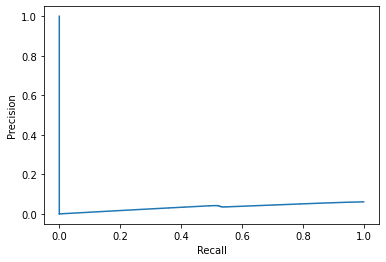

In [43]:
test_1 = scale(df.loc[df['test'] == 1].iloc[:,:-2])
true_class_1 = numpy.array(df[df["test"] == 1].iloc[:, -2])
model_class_1 = best_params.predict(test_1)

precision_1, recall_1, _ = precision_recall_curve(true_class_1, best_params.decision_function(test_1))
curve_1 = PrecisionRecallDisplay(precision=precision_1, recall=recall_1)
mcc_1 = matthews_corrcoef(true_class_1, model_class_1)
voi_1 = variation_of_information_score(true_class_1, model_class_1)

print(curve_1.plot())
print("MCC: ", mcc_1)
print("Variation of Information: ", voi_1)

#### Analysis
Here we can see that the Matthew's Correlation Coefficient is very near 0, which means that the model is not effective, and that working out whether traffic is normal or not is just as effective as flipping a coin. On top of this, we have that the Variation of Information metric is fairly high. This indicates that there is very little overlap in the clusters between the predicted clustering and actual clustering. On top of this the precision-recall curve shows very poor form. Therefore, overall we can see that for the Denial of Service attacks, this model is very poor at predicting them. 

### Test Class 2 (Remote to Local)

MCC:  0.7933329849020653
Variation of Information:  0.12707816650240567


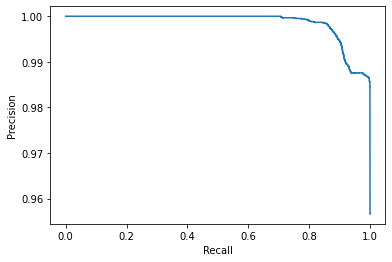

In [44]:
test_2 = scale(df.loc[df['test'] == 2].iloc[:,:-2])
true_class_2 = numpy.array(df[df["test"] == 2].iloc[:, -2])
model_class_2 = best_params.predict(test_2)

precision_2, recall_2, _ = precision_recall_curve(true_class_2, best_params.decision_function(test_2))
curve_2 = PrecisionRecallDisplay(precision=precision_2, recall=recall_2)
mcc_2 = matthews_corrcoef(true_class_2, model_class_2)
voi_2 = variation_of_information_score(true_class_2, model_class_2)

print(curve_2.plot())
print("MCC: ", mcc_2)
print("Variation of Information: ", voi_2)

#### Analysis
Here we can see the Mathew's Correlation Coefficient is good, which means that the model is good at predicting Remote to Local attacks. The Variation of Information is fairly good, which mean that much of the clusters overlap between the clusters. Finally, the precision-recall curve is very good, especially considering the precision axis scale. It shows us that the precision is very good and recall is slightly worse. With all of this, it shows that this model is reasonable at predicting Remote to Local attacks.

### Test Class 3 (User to Root)

MCC:  0.4239538301264504
Variation of Information:  0.04513077199601291


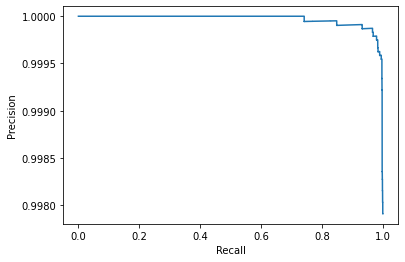

In [45]:
test_3 = scale(df.loc[df['test'] == 3].iloc[:,:-2])
true_class_3 = numpy.array(df[df["test"] == 3].iloc[:, -2])
model_class_3 = best_params.predict(test_3)

precision_3, recall_3, _ = precision_recall_curve(true_class_3, best_params.decision_function(test_3))
curve_3 = PrecisionRecallDisplay(precision=precision_3, recall=recall_3)
mcc_3 = matthews_corrcoef(true_class_3, model_class_3)
voi_3 = variation_of_information_score(true_class_3, model_class_3)

print(curve_3.plot())
print("MCC: ", mcc_3)
print("Variation of Information: ", voi_3)

#### Analysis
Here we have that the MCC is okay, but not good. However, the precision recall curve is very good. This means that as both precision and recall track true positives, that this model is not very good at finding malicious data and assigns more traffic as normal than it should. In return it is good at correctly identifying normal traffic. On top of this, we have that the variation of information is very low, which with the other metrics indicates that there are lots of boundary cases, i.e this model could be improved with some small alterations. Therefore, this model is okay when flagging User to Root, however with some small changes could be improved greatly. 

### Test Class 4 (Probing)

MCC:  0.9596321283494833
Variation of Information:  0.10085076134423798


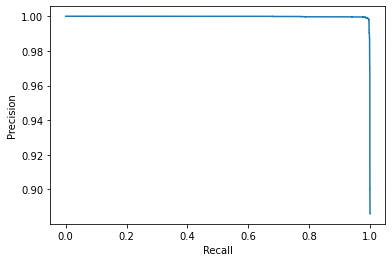

In [46]:
test_4 = scale(df.loc[df['test'] == 4].iloc[:,:-2])
true_class_4 = numpy.array(df[df["test"] == 4].iloc[:, -2])
model_class_4 = best_params.predict(test_4)

precision_4, recall_4, _ = precision_recall_curve(true_class_4, best_params.decision_function(test_4))
curve_4 = PrecisionRecallDisplay(precision=precision_4, recall=recall_4)
mcc_4 = matthews_corrcoef(true_class_4, model_class_4)
voi_4 = variation_of_information_score(true_class_4, model_class_4)

print(curve_4.plot())
print("MCC: ", mcc_4)
print("Variation of Information: ", voi_4)

#### Analysis
Here the Matthew's Correlation Coefficient is very high, and that the precision-recall curve is very good. Therefore, we have that much of the traffic is correctly categorised. We also have that the Variation of information is fairly low, and so indicating a great overlap in the clusters between the clusterings. Therefore, this model is very effective at identifying probing attacks. 

### Conclusion 
I am reasonably happy with the performance of this model, although it has very poor performance for DoS attacks, it does well with Remote Access attacks and very well with probing attacks. Also, I believe that with some small adjustments, it would be very effective for privilege escelation attacks but it does okay with them in their current state. 

Reference: \
[1] https://en.wikipedia.org/wiki/Matthews_correlation_coefficient \
[2] http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.164.6189&rep=rep1&type=pdf